In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import datetime

from cartopy import crs as ccrs, feature as cfeature
import warnings
warnings.filterwarnings('ignore')

import netCDF4
from netCDF4 import Dataset

import xarray as xr
import glob, os
#print(xr.__version__)

In [5]:
filename = '/d6/bxw2101/seaice_conc_monthly/all_seaice_conc_monthly.nc'
ds = xr.open_dataset(filename)
ds = ds.rename(time='tdim')
ds = ds.rename(xgrid='x')
ds = ds.rename(ygrid='y')

### For this xarray dataset:
x and y are expected to go lowest to highest value.

In [10]:
sic_var_b4 = ds.cdr_seaice_conc_monthly
sic_var = sic_var_b4.isel(x=slice(0,316), y=slice(0,332))
### This enables us to use .loc and .sel() yay!

In [67]:
### Selections, .sel(), w/ the whole dataset ds are limited.
# You have to use .sel() on the sic_var variable just created.
ds_selection = ds.isel(tdim=0)

### Selections w/ just one single tdim (month) for sic_var variable
first_month = sic_var[0,:,:]
selection = sic_var.sel(tdim='2021-12-01')
sic_var.sel(tdim='2018-01-02', method='nearest', tolerance=datetime.timedelta(days=2))
sic_var.loc['2018-03-01']
#____All of these work! YAY! (they run w/o errors, not sure yet if they actually WORK work)

<xarray.DataArray 'cdr_seaice_conc_monthly' (y: 332, x: 316)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
    tdim     datetime64[ns] 2018-03-01
  * x        (x) float32 -3.938e+06 -3.912e+06 ... 3.912e+06 3.938e+06
  * y        (y) float32 4.338e+06 4.312e+06 4.288e+06 ... -3.912e+06 -3.938e+06
Attributes:
    long_name:            NOAA/NSIDC Climate Data Record of Passive Microwave...
    standard_name:        sea_ice_area_fraction
    units:                1
    flag_values:          [251 252 253 254 255]
    flag_meanings:        pole_hole lakes coastal land_mask missing_data
    datum:                +ellps=urn:ogc:def:crs:EPSG::4326
    grid_mapping:         projection
    reference:            https://nsidc.org/data/g02202/versions/4/
    ancillary_variables:  stdev_of_cdr_seaice_conc_monthly qa_of_cdr_seaice_c...
    valid_range:          [  0 100]

In [48]:
#sic_var_b4

In [47]:
#sic_var
#sic_var[0][0]

## Creating some plots and maps with selections and slices

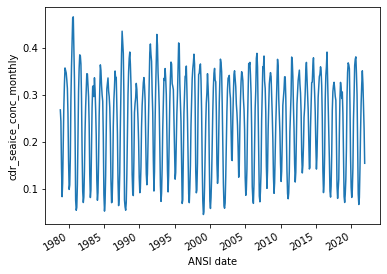

In [12]:
#Slicing into x,y grid portions:
slice_temps = sic_var.isel(x=slice(10, 120), y=slice(10, 120))
slice_avg = slice_temps.mean(dim=['x', 'y'])
slice_avg.plot()

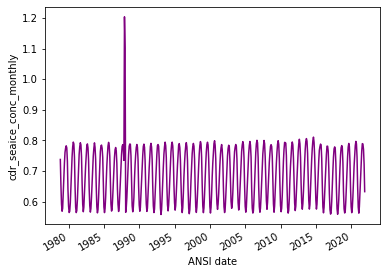

In [13]:
means = sic_var.mean(dim=['x', 'y'])
means.plot(color="purple")
# what the FUCK is that one damn line at around tdim=120

<xarray.DataArray 'cdr_seaice_conc_monthly' (y: 332, x: 316)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * x        (x) float32 -3.938e+06 -3.912e+06 ... 3.912e+06 3.938e+06
  * y        (y) float32 4.338e+06 4.312e+06 4.288e+06 ... -3.912e+06 -3.938e+06


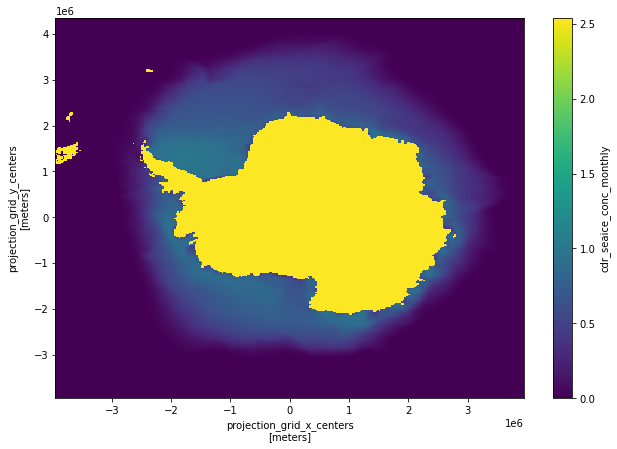

In [83]:
tmeans = sic_var.mean(dim='tdim')


sp = ccrs.SouthPolarStereo()
p = tmeans.plot(size=7)
#p = tmeans.plot(subplot_kws=dict(projection=sp))
### This plot is actually pretty decent! YAY!
# But you DEF have to continue adding contour lines, etc etc. figure out the .plot() stuff.


#p.axes.coastlines()

mins = sic_var.min(dim='tdim')
print(mins)

In [75]:
#tmeans

<xarray.DataArray 'cdr_seaice_conc_monthly' (y: 332, x: 316)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * x        (x) float32 -3.938e+06 -3.912e+06 ... 3.912e+06 3.938e+06
  * y        (y) float32 4.338e+06 4.312e+06 4.288e+06 ... -3.912e+06 -3.938e+06

array([251, 252, 253, 254, 255], dtype=uint8)

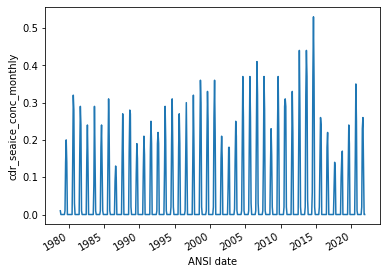

In [16]:
#ds.cdr_seaice_conc_monthly.mean(dim=['y', 'x']).plot()
sic_var.median(dim=['y', 'x']).plot()
#seems like permanent ice has it set to a value of 2.54
#possibly we want to go back and mask the flagged values?
sic_var.flag_values

0.97999996


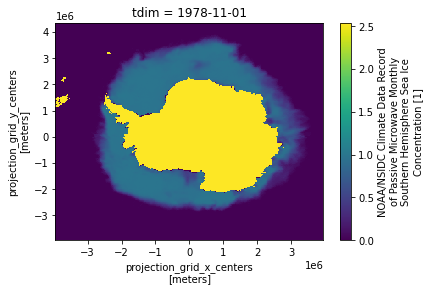

In [17]:
#first_month = sic_var[0,:,:]
frame = first_month.plot()
print(first_month[50, 150].values)

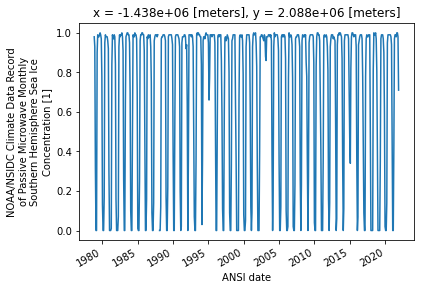

In [18]:
point_sic = sic_var.isel(x=100, y=90)
point_sic.plot()
p = point_sic.sel(tdim='1978-11-01')

## Compute Climatology

In [19]:
sic_clim = sic_var.groupby(ds.tdim.dt.month).mean()
sic_clim

<xarray.DataArray 'cdr_seaice_conc_monthly' (month: 12, y: 332, x: 316)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * x        (x) float32 -3.938e+06 -3.912e+06 ... 3.912e+06 3.938e+06
  * y        (y) float32 4.338e+06 4.312e+06 4.288e+06 ... -3.912e+06 -3.938e+06
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

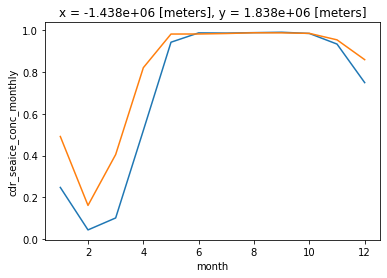

In [20]:
sic_clim.isel(x=100, y=90).plot()
sic_clim.isel(x=100, y=100).plot()

<xarray.DataArray 'cdr_seaice_conc_monthly' (month: 12, y: 332)>
array([[1.8083181e-05, 1.3562387e-05, 1.3562387e-05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.0606416e-05, 1.1039152e-05, 2.1342359e-05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.6926699e-05, 2.0606416e-05, 1.8398587e-05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.7229906e-05, 1.9134530e-05, 1.2511040e-05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.2295742e-05, 1.8699655e-05, 1.9418871e-05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.6797173e-06, 8.8313218e-06, 4.4156609e-06, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)
Coordinates:
  * y        (y) float32 4.338e+06 4.312e+06 4.288e+06 ... -3.912e+06 -3.938e+06
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12


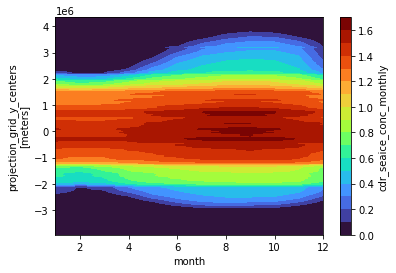

In [69]:
# Zonal mean climatology - idk what this means rly.
lat_means = sic_clim.mean(dim='x')
print(x_means)
lat_means.transpose().plot.contourf(levels=20, cmap='turbo')

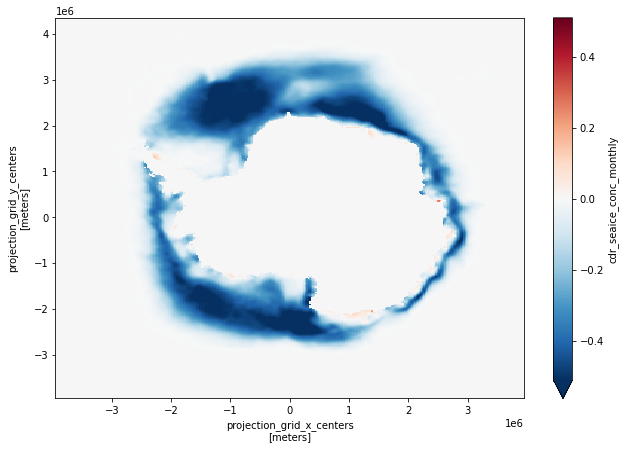

In [24]:
(sic_clim.sel(month=1) - sic_clim.sel(month=12)).plot(size=7, robust = True)

## Compute Anomaly

In [25]:
gb = sic_var.groupby('tdim.month')
sic_anom = gb - gb.mean(dim='tdim')
sic_anom

<xarray.DataArray 'cdr_seaice_conc_monthly' (tdim: 518, y: 332, x: 316)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * tdim     (tdim) datetime64[ns] 1978-11-01 1978-12-01 ... 2021-12-01
  * x        (x) float32 -3.938e+06 -3.912e+06 ... 3.912e+06 3.938e+06
  * y        (y) float32 4.338e+06 4.312e+06 4.288e+06 ... -3.912e+06 -3.938e+06
    month    (tdim) int64 11 12 1 2 3 4 5 6 7 8 9 ... 2 3 4 5 6 7 8 9 10 11 12

In [ ]:
sic_clim.isel(x=100, y=90).plot()

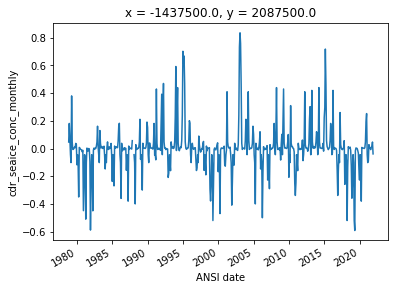

In [68]:
sic_anom.isel(x=100, y=90).plot()

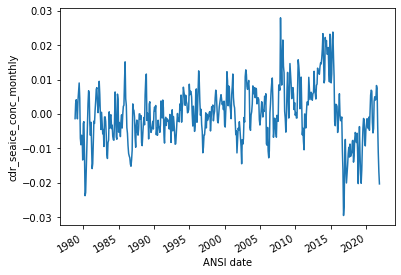

In [71]:
unweighted_mean_global_anom = sic_anom.mean(dim=['x', 'y'])
unweighted_mean_global_anom.plot()

## Using other functionalities

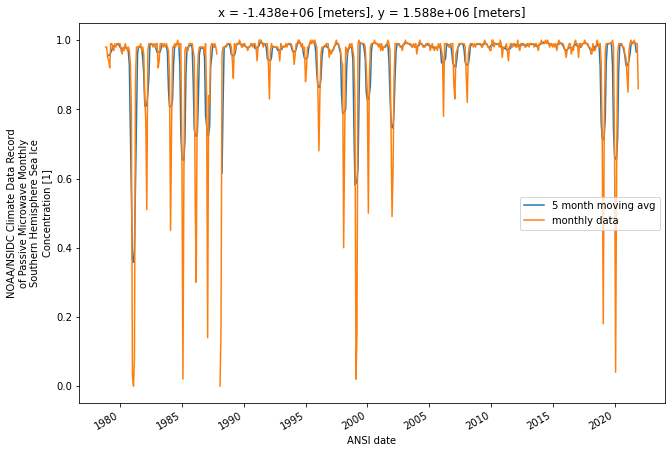

In [31]:
# using .rolling
moving_avg = sic_var.rolling(tdim=5, center=True).mean()
moving_avg.isel(x=100, y=110).plot(size=7)
sic_var.isel(x=100, y=110).plot()
plt.legend(['5 month moving avg', 'monthly data'])


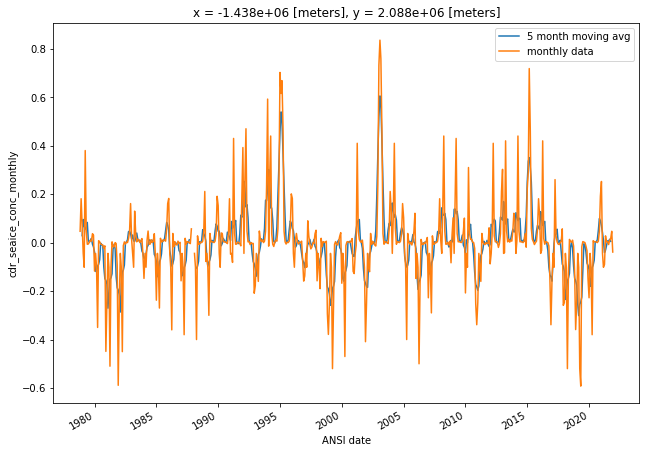

In [33]:
moving_anom = sic_anom.rolling(tdim=5, center=True).mean()
moving_anom.isel(x=100, y=90).plot(size=7)
sic_anom.isel(x=100, y=90).plot()
plt.legend(['5 month moving avg', 'monthly data'])

Text(0.5, 1.0, '5 month Moving Average of x=100, y=90')

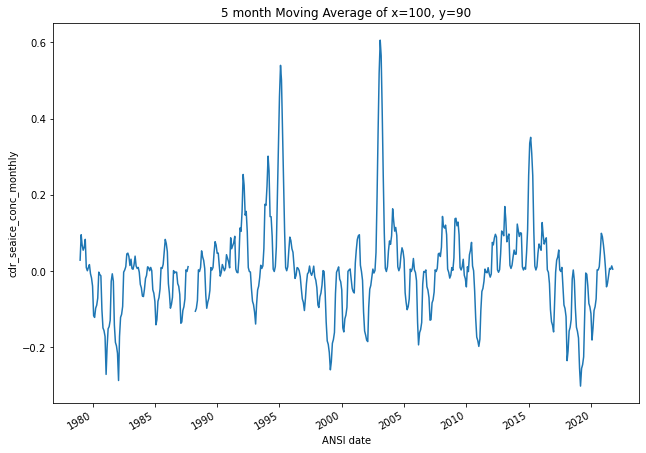

In [37]:
moving_anom.isel(x=100, y=90).plot(size=7)
plt.title('5 month Moving Average of x=100, y=90')

## You should flag for values < 2.51 immediately before doing anything else.

In [52]:
sic_var.flag_values[0]
masked_sic_var = sic_var.where(sic_var < 2.51)
masked_sic_var

<xarray.DataArray 'cdr_seaice_conc_monthly' (tdim: 518, y: 332, x: 316)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * tdim     (tdim) datetime64[ns] 1978-11-01 1978-12-01 ... 2021-12-01
  * x        (x) float32 -3.938e+06 -3.912e+06 ... 3.912e+06 3.938e+06
  * y        (y) float32 4.338e+06 4.312e+06 4.288e+06 ... -3.912e+06 -3.938e+06
Attributes:
    long_name:            NOAA/NSIDC Climate Data Record of Passive Microwave...
    standard_name:        sea_ice_area_fraction
    units:                1
    flag_values:          [251 252 253 254 255]
    flag_meanings:        pole_hole lakes coastal land_mask missing_data
    datum:                +ellps=urn:ogc:def:crs:EPSG::4326
    grid_mapping:         projection
    reference:            https://nsidc.org/data/g02202/versions/4/
    ancillary_variables:  stdev_of_cdr_seaice_conc_monthly qa_of_cdr_seaice_c...
    valid_range:          [  0 100]

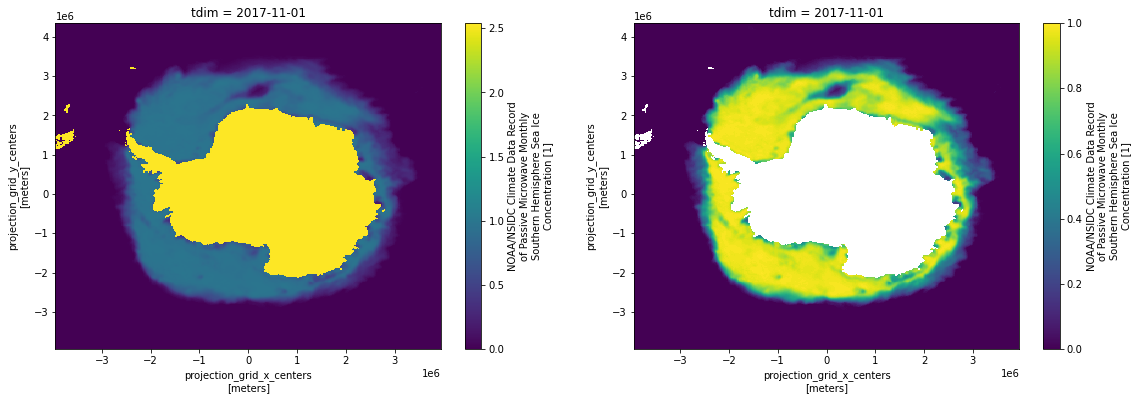

In [64]:
tmeans = sic_var.mean(dim='tdim')

fig, axes = plt.subplots(ncols=2, figsize=(19, 6))
sic_var.sel(tdim='2017-11-01').plot(ax=axes[0])
masked_sic_var.sel(tdim='2017-11-01').plot(ax=axes[1]);
#ax = axes[0]
#ax.coastlines()

In [ ]:
# FIGURING OUT HOW TO DO CARTOPY AND XARRAY TG.
sp = ccrs.SouthPolarStereo()
fig2 = plt.figure(figsize=(8.5, 8.5))
# p = ds.cdr_seaice_conc_monthly.mean(dim='tdim').plot(subplot_kws={'projection': sp})
# ax = plt.subplot(1, 1, 1, projection=sp)
# ax.coastlines()
